# Data Exploration

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


df = pd.read_csv('/home/rvanelven/code/Rvanelven/steamator/raw_data/steam.csv')

In [7]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [84]:
df['categories'].value_counts()

Single-player                                                                                                              6110
Single-player;Steam Achievements                                                                                           2334
Single-player;Steam Achievements;Steam Trading Cards                                                                        848
Single-player;Partial Controller Support                                                                                    804
Single-player;Steam Trading Cards                                                                                           792
                                                                                                                           ... 
Single-player;Steam Achievements;Steam Trading Cards;Captions available;Partial Controller Support;Commentary available       1
Single-player;Steam Achievements;Full controller support;Steam Trading Cards;VR Support;Steam Cloud;Stea

In [86]:
df['genres'].value_counts()

Action;Indie                                                             1852
Casual;Indie                                                             1482
Action;Adventure;Indie                                                   1229
Adventure;Indie                                                          1170
Action;Casual;Indie                                                      1004
                                                                         ... 
Sexual Content;Violent;Gore;Action;Casual;Free to Play;Indie;Strategy       1
Nudity;Violent;Gore;Adventure;Indie;RPG;Early Access                        1
Violent;Action;Adventure;Casual;Indie;RPG;Early Access                      1
Indie;Simulation;Web Publishing                                             1
Casual;Free to Play;Massively Multiplayer;RPG;Early Access                  1
Name: genres, Length: 1552, dtype: int64

In [9]:
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [18]:
df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

<AxesSubplot:>

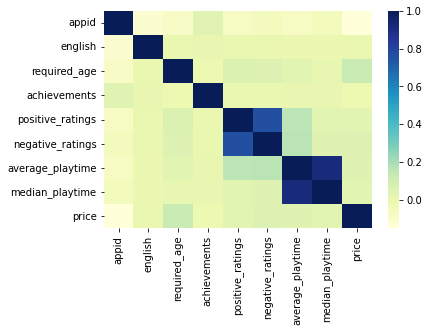

In [10]:
import seaborn as sns

# Heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [12]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(10)

,feature_1,feature_2,correlation
69,median_playtime,average_playtime,0.914900
61,average_playtime,median_playtime,0.914900
49,negative_ratings,positive_ratings,0.762804
41,positive_ratings,negative_ratings,0.762804
59,average_playtime,negative_ratings,0.161140
51,negative_ratings,average_playtime,0.161140
42,positive_ratings,average_playtime,0.157898
58,average_playtime,positive_ratings,0.157898
26,required_age,price,0.120358
74,price,required_age,0.120358


In [45]:
df.loc[[21105]]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
21105,821800,ADR-Labelling Game,2018-04-12,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,Single-player,Simulation,Simulation;Difficult,0,1,0,0,0,0-20000,421.99


In [48]:
df.loc[[14917]]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
14917,648070,CrisisActionVR,2017-09-11,1,Pixel Wonder,Pixel Wonder,windows,0,Single-player;Multi-player;Online Multi-Player...,Violent;Gore;Action;Adventure;Indie;Massively ...,Massively Multiplayer;Indie;Action,20,14,10,0,0,0-20000,154.99


In [47]:
df.loc[[10034]] 

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
10034,502570,Houdini Indie,2018-10-10,1,SideFX,SideFX,windows,0,Partial Controller Support;Steam Cloud,Animation & Modeling;Design & Illustration;Gam...,Animation & Modeling;Game Development;3D,0,23,0,0,0,0-20000,209.99


In [62]:
df['developer'].value_counts().sort_values()

Downie Dave;Mixtape                        1
LUCKY GIRLS LIMITED                        1
dimecoin;Bestow                            1
Concrete Games Classic;Corentin Derbré     1
Evan (Solidplasma) Peiperl                 1
                                          ..
Nikita "Ghost_RUS"                        50
Laush Dmitriy Sergeevich                  51
Ripknot Systems                           62
KOEI TECMO GAMES CO., LTD.                72
Choice of Games                           94
Name: developer, Length: 17113, dtype: int64

In [73]:
df['average_playtime'].sort_index(ascending=True).tail(20)

27055    0
27056    0
27057    0
27058    0
27059    0
27060    0
27061    0
27062    0
27063    0
27064    0
27065    0
27066    0
27067    0
27068    0
27069    0
27070    0
27071    0
27072    0
27073    0
27074    0
Name: average_playtime, dtype: int64

In [ ]:
df[df['model'].str.match('Mac')]

In [65]:
df['developer'].str.contains('Activision').value_counts()

False    27071
True         4
Name: developer, dtype: int64

In [ ]:
if s.find("is") == -1:
    print("No 'is' here!")
else:
    print("Found 'is' in the string.")

In [82]:
df['price'].sort_values()

5881       0.00
14473      0.00
23674      0.00
10215      0.00
17121      0.00
          ...  
7992     154.99
14917    154.99
10034    209.99
13062    303.99
21105    421.99
Name: price, Length: 27075, dtype: float64

In [38]:
df['owners'].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [36]:
top_27_owners = df[
            (df['owners'] == '10000000-20000000') |
            (df['owners'] == '20000000-50000000') | 
            (df['owners'] == '50000000-100000000') | 
            (df['owners'] == '100000000-200000000')
          ]

top_27_owners.sort_values(by='owners')

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
7809,433850,Z1 Battle Royale,2018-02-28,1,NantG,Daybreak Game Company,windows,0,Multi-player;Online Multi-Player;In-App Purchases,Action;Adventure;Free to Play;Massively Multip...,Survival;Massively Multiplayer;Multiplayer,0,111434,91664,3142,162,10000000-20000000,0.00
3251,301520,Robocraft,2017-08-24,1,Freejam,Freejam,windows;mac;linux,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Free to Play;Indie;Massively Multiplaye...,Free to Play;Robots;Building,43,80360,30987,1369,211,10000000-20000000,0.00
2952,291550,Brawlhalla,2017-10-17,1,Blue Mammoth Games,Ubisoft,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Free to Play;Indie,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.00
2951,291480,Warface,2014-07-01,1,My.com,My.com,windows,16,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Free to Play;Massively Multiplayer,Free to Play;FPS;Multiplayer,30,32751,14409,949,104,10000000-20000000,0.00
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
1772,238960,Path of Exile,2013-10-23,1,Grinding Gear Games,Grinding Gear Games,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Free to Play;Indie;Massively ...,Free to Play;Action RPG;Hack and Slash,120,71593,6117,5263,492,10000000-20000000,0.00
1727,236390,War Thunder,2013-08-15,1,Gaijin Entertainment,Gaijin Entertainment,windows;mac;linux,0,Single-player;MMO;Co-op;Cross-Platform Multipl...,Action;Free to Play;Massively Multiplayer;Simu...,Free to Play;World War II;Multiplayer,46,83852,22166,4200,297,10000000-20000000,0.00
1607,227940,Heroes & Generals,2016-10-18,1,RETO MOTO,RETO MOTO,windows,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Free to Play;Indie;Massively Multiplayer,Free to Play;World War II;Multiplayer,0,65856,34416,1752,76,10000000-20000000,0.00
1467,218620,PAYDAY 2,2013-08-13,1,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,308657,56523,3975,890,10000000-20000000,7.49


In [77]:
def get_labels(data):
    unique_labels = []
    all_labels = []

    for i in range(len(data)):
        for label in data[i]:
            all_labels.append(label)
            if label not in unique_labels:
                unique_labels.append(label)

    print('Number of unique labels:', len(unique_labels))
    print('Number of total labels applied:', len(all_labels))

    return unique_labels, all_labels

Number of unique labels: 46
Number of total labels applied: 1489172


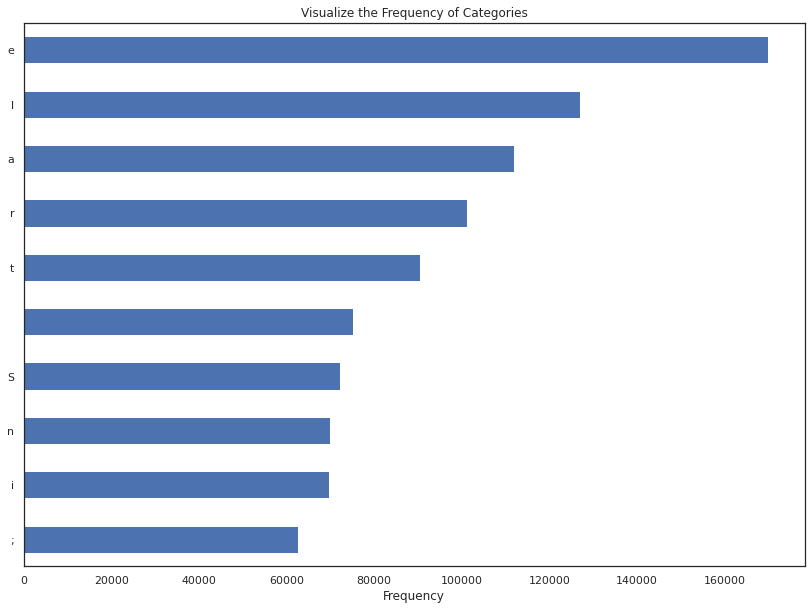

In [79]:
unique_cats, all_cats = get_labels(df['categories'])
#unique_cats[:10]
plt.figure(figsize = (14, 10))
pd.Series(all_cats).value_counts()[:10].plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Visualize the Frequency of Categories')
plt.show()